Spektrogram je vizuelna reprezentacija spektra frekvencija zvuka (ili drugih signala) u vremenu. 
<br>
Vise na: https://en.wikipedia.org/wiki/Spectrogram

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# scipy podrska u radu sa wav fajlovima
from scipy.io import wavfile

# API koji IPython nudi za prikaz razlicitih formata (HTML, JSON, JavaScript Latex...)
from IPython import display

%matplotlib inline

In [39]:
# fragment pesme ciji audio spektrogram zelimo da odredimo
# https://www.youtube.com/watch?v=_xqXP6tiA-k :) 
display.Audio(url='zvuk/bonobo_towers.wav')

In [20]:
# funkcija read sluzi za uzorkovanje audio fajlova 
# povratne vrednosti su redom frekvencija uzorkovanja i sami uzorci
Fs, samples = wavfile.read('zvuk/bonobo_towers.wav')

In [21]:
# frekvencija uzorkovanja
Fs

44100

In [22]:
# uzorci
samples

array([[  949,  2812],
       [  505,  2505],
       [ -236,  1831],
       ..., 
       [-6693, -7606],
       [-6153, -7647],
       [-6275, -7735]], dtype=int16)

In [23]:
# prebacujemo se sa stereo na mono analizu uprosecavanjem vrednosti
samples = samples.mean(axis = 1 )

In [24]:
samples

array([ 1880.5,  1505. ,   797.5, ..., -7149.5, -6900. , -7005. ])

In [25]:
# ukupno trajanje audio zapisa u sekundama
duration = samples.shape[0]*1.0/Fs
duration

30.0

In [26]:
# frekvencijski spektar muzickih numera je vrlo bogat i brzo se menja u vremenu
# zato ima smisla audio segmente posmatrati u kratkim vremenskim intervalima 
# npr. nase posmatranje ce biti na 0.5 sekundi 

In [40]:
# odredjujemo frekvencijski spektar prvih N uzoraka
N = Fs/2
t = np.linspace(0, 0.5, N)
freq = np.fft.fftfreq(N, 1./Fs)
subsamples = samples[:N]
c = np.fft.fft(subsamples)

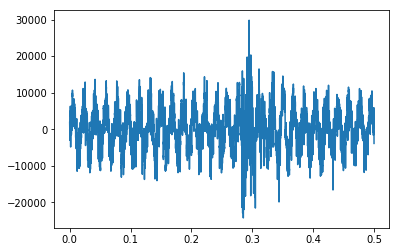

In [31]:
plt.plot(t, subsamples)

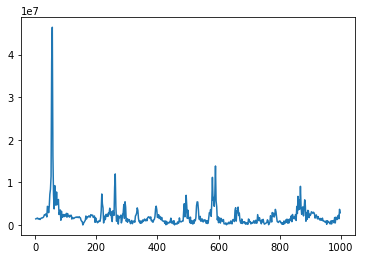

In [32]:
# suzavamo prikaz samo na nekom opsegu frekvencija npr. [0, 1000] 
mask = (freq>0) * (freq<1000)
plt.plot(freq[mask], np.abs(c[mask]))

In [33]:
# odredjujemo koliko imamo audio parcica  
n_max = int(samples.shape[0] / N)
# odredjujemo koliko imamo frekvencija
f_values = np.sum(1 * mask)
# inicijalizujemo spektrogram 
spectogram_data = np.zeros((n_max, f_values))

In [36]:
# poboljsavamo kvalitet zvuka koristeci filtere
window = signal.blackman(N)

In [41]:
# za svaki audio parcic ponavljamo prethodnu proceduru 
for n in range(0, n_max):
    # izdvajamo odgovarajuce uzorke
    subdata = samples[(N * n):(N * (n + 1))]
    # odredjujemo frekvencijski spektar
    F = np.fft.fft(subdata * window)    
    # i dodajemo ga u spektrogram
    spectogram_data[n, :] = np.log(np.abs(F[mask]))

In [42]:
# spektar prikazujemo kao heat mapu  
plt.figure(figsize=(10, 5))
plt.imshow(spectogram_data, extent = (0, 1000, 0, duration), aspect='auto')
plt.colorbar()
plt.xlabel('Frekvencija (Hz)')
plt.ylabel('Vreme (s)')